In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import pickle as pkl
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras import models 
from keras.models import Model

from keras import layers
from keras.utils import to_categorical 
from keras.optimizers import RMSprop, Adam
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dense, Dropout, Flatten, GlobalAveragePooling2D
from keras.models import load_model

from sklearn.metrics import confusion_matrix, classification_report
import scikitplot as skplt

Using TensorFlow backend.
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py

In [2]:
# load model
model_cnn = models.load_model('/Users/burakcivitcioglu/Documents/doctorat/ising/neural_networks/cnn_class_3_epoch_100')
data_dir = '/Users/burakcivitcioglu/Documents/doctorat/ising/test_data/ising_data_3_class'



Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [3]:
train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.8)
test_datagen = ImageDataGenerator(rescale=1./255)

lattice_size = 100
batch_size = 16
input_shape_img = (lattice_size,lattice_size,3)


validation_set= train_datagen.flow_from_directory(
                                              data_dir,
                                              subset='validation', 
                                              target_size = (lattice_size,lattice_size),
                                              batch_size = batch_size, 
                                              class_mode='categorical',
                                              shuffle=False)



Found 5754 images belonging to 3 classes.


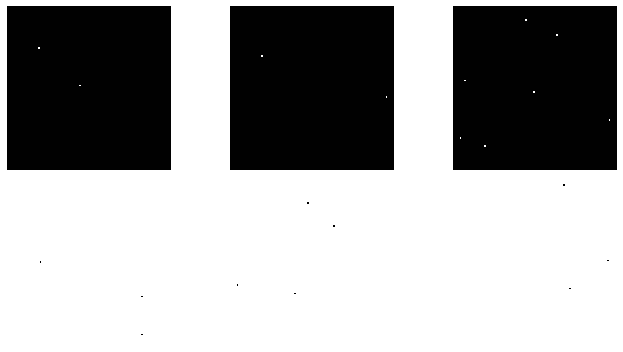

In [4]:
plt.figure(figsize=(10,5))
for i in range(6):
    plt.subplot(2,3,i+1)
    for x,y in validation_set:
        plt.imshow(x[0],cmap='hsv')
        #plt.title('y={}'.format(y[0]))
        plt.axis('off')
        break
plt.tight_layout()
plt.show()

In [5]:
model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 100, 100, 25)      700       
_________________________________________________________________
batch_normalization_1 (Batch (None, 100, 100, 25)      100       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 100, 100, 25)      5650      
_________________________________________________________________
batch_normalization_2 (Batch (None, 100, 100, 25)      100       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 25)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 50, 25)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 50, 50, 75)       

In [6]:
test_loss_cnn, test_acc_cnn = model_cnn.evaluate(validation_set)
print("The accuracy of the model on the test set is ",100*test_acc_cnn, "%")

360/360 [==============================] - 90s 249ms/step
The accuracy of the model on the test set is  100.0 %


In [7]:
Y_pred = model_cnn.predict_generator(validation_set, steps = np.ceil(validation_set.samples / batch_size))
y_pred = np.argmax(Y_pred, axis=1)

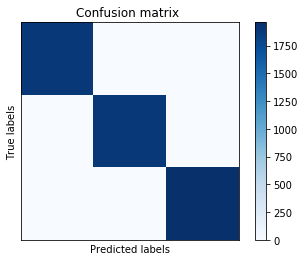

In [8]:
cm = confusion_matrix(validation_set.classes, y_pred)

plt.imshow(cm, cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks([], [])
plt.yticks([], [])
plt.title('Confusion matrix ')
plt.colorbar()
file_name_cm = f'confusion_matrix_{validation_set.num_classes}.png'

plt.savefig(file_name_cm)
plt.show()

In [9]:
report = classification_report(validation_set.classes, y_pred, output_dict = True)
clsf_report = pd.DataFrame(report).transpose()
file_name_report = f'classification_report_{validation_set.num_classes}.csv'
clsf_report.to_csv(file_name_report, index= True)


In [10]:
pd.read_csv(file_name_report)

,Unnamed: 0,precision,recall,f1-score,support
0,0,1.0,1.0,1.0,1897.0
1,1,1.0,1.0,1.0,1897.0
2,2,1.0,1.0,1.0,1960.0
3,accuracy,1.0,1.0,1.0,1.0
4,macro avg,1.0,1.0,1.0,5754.0
5,weighted avg,1.0,1.0,1.0,5754.0
